In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Better visuals ke liye
plt.style.use("default")


In [3]:
file_path = "/content/drive/MyDrive/Customer_churn_Telecom/data/processed/churn_cleaned.csv"
df = pd.read_csv(file_path)

df.head()


,Tenure Months,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Gender_Male,Senior Citizen_Yes,Partner_Yes,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,108.15,1,1,86,3239,True,False,False,...,False,False,False,False,False,False,True,False,False,True
1,2,70.70,151.65,1,1,67,2701,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,8,99.65,820.50,1,1,86,5372,False,False,False,...,False,True,False,True,False,False,True,False,True,False
3,28,104.80,3046.05,1,1,84,5003,False,False,True,...,False,True,False,True,False,False,True,False,True,False
4,49,103.70,5036.30,1,1,89,5340,True,False,False,...,False,True,False,True,False,False,True,False,False,False


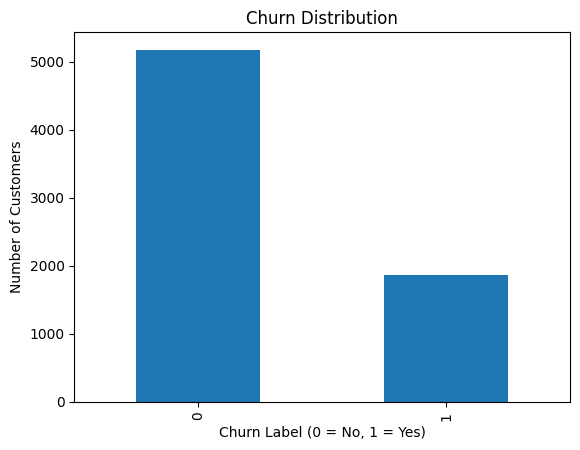

In [4]:
# Churn distribution dekhne ke liye
churn_counts = df["Churn Label"].value_counts()

plt.figure()
churn_counts.plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn Label (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()


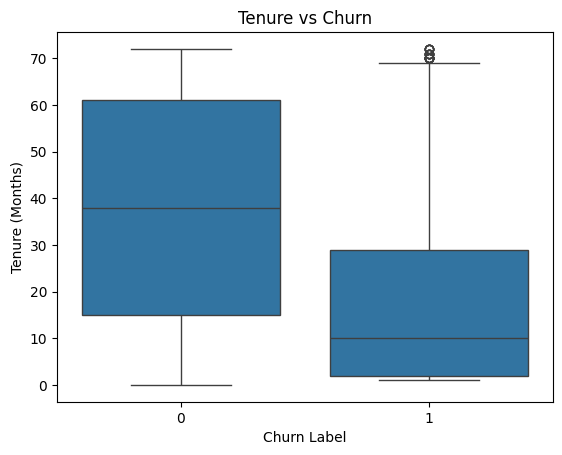

In [5]:
plt.figure()
sns.boxplot(x="Churn Label", y="Tenure Months", data=df)
plt.title("Tenure vs Churn")
plt.xlabel("Churn Label")
plt.ylabel("Tenure (Months)")
plt.show()


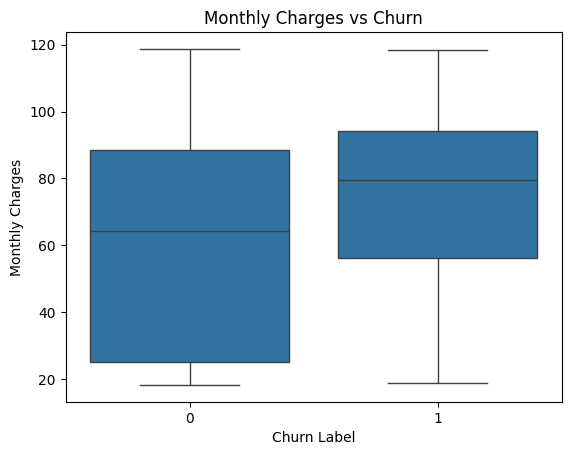

In [6]:
plt.figure()
sns.boxplot(x="Churn Label", y="Monthly Charges", data=df)
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn Label")
plt.ylabel("Monthly Charges")
plt.show()


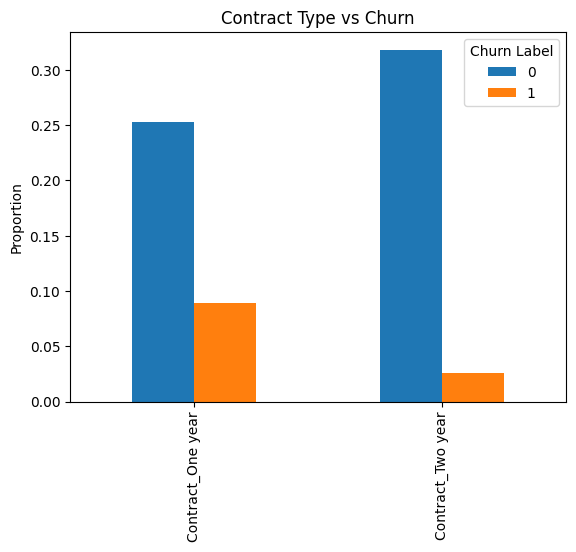

In [7]:
contract_cols = [col for col in df.columns if "Contract_" in col]

contract_churn = df.groupby("Churn Label")[contract_cols].mean()

contract_churn.T.plot(kind="bar")
plt.title("Contract Type vs Churn")
plt.ylabel("Proportion")
plt.show()


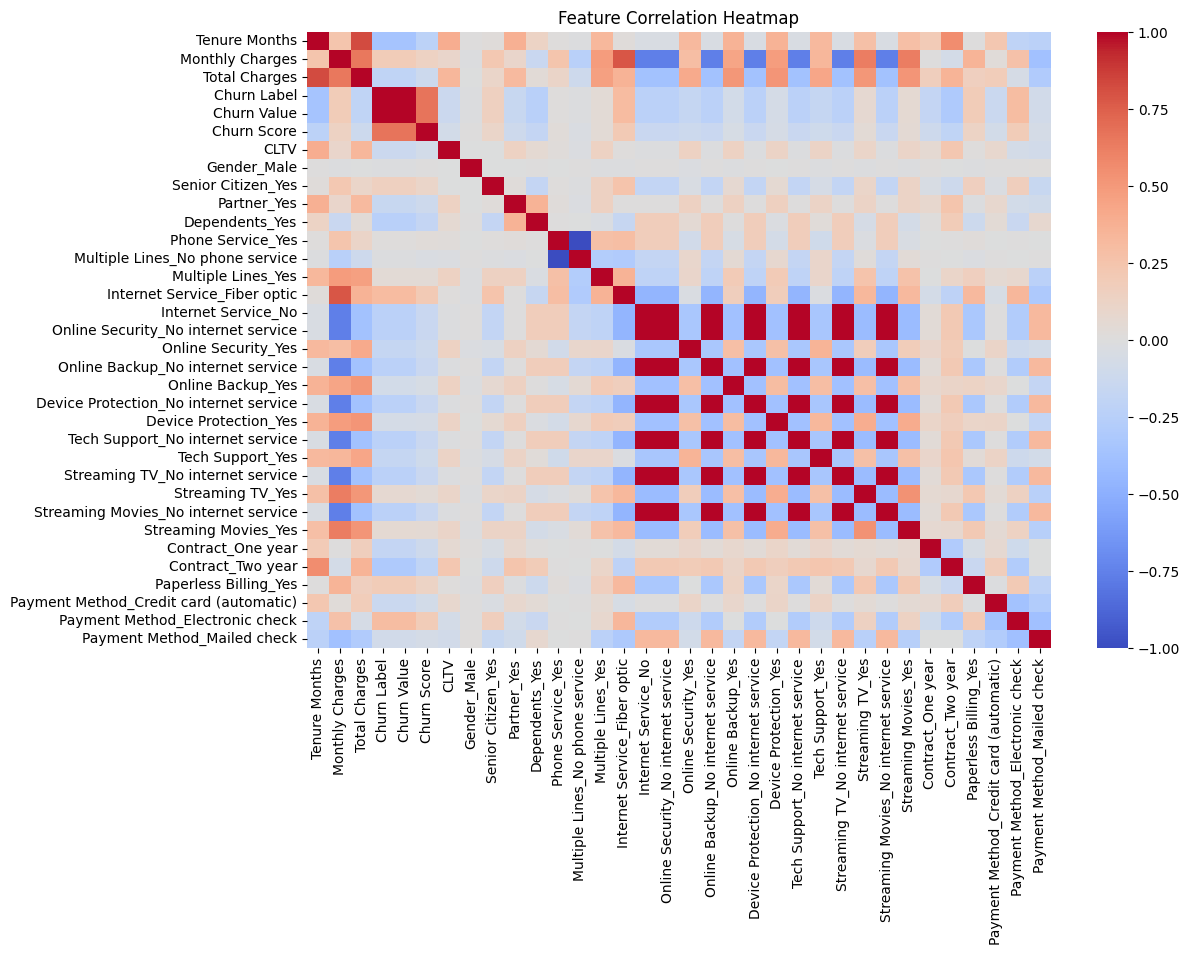

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.corr(),
    cmap="coolwarm",
    cbar=True
)
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
import os

report_path = "/content/drive/MyDrive/Customer_churn_Telecom/reports/figures"
os.makedirs(report_path, exist_ok=True)


In [10]:
plt.figure()
churn_counts.plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn Label (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.savefig(os.path.join(report_path, "Fig1_Churn_Distribution.png"))
plt.close()


In [11]:
plt.figure()
sns.boxplot(x="Churn Label", y="Tenure Months", data=df)
plt.title("Tenure vs Churn")
plt.savefig(os.path.join(report_path, "Fig2_Tenure_vs_Churn.png"))
plt.close()


In [12]:
plt.figure()
sns.boxplot(x="Churn Label", y="Monthly Charges", data=df)
plt.title("Monthly Charges vs Churn")
plt.savefig(os.path.join(report_path, "Fig3_MonthlyCharges_vs_Churn.png"))
plt.close()


In [13]:
contract_churn.T.plot(kind="bar")
plt.title("Contract Type vs Churn")
plt.ylabel("Proportion")
plt.savefig(os.path.join(report_path, "Fig4_Contract_vs_Churn.png"))
plt.close()


In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.savefig(os.path.join(report_path, "Fig5_Correlation_Heatmap.png"))
plt.close()


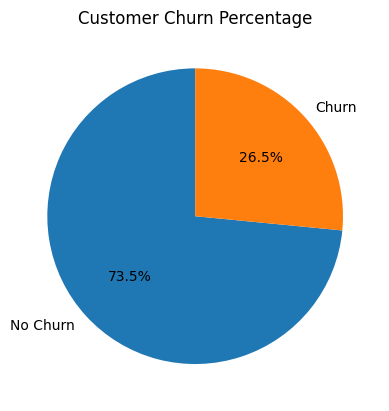

In [15]:
# Churn ka percentage share dekhne ke liye pie chart
churn_percent = df["Churn Label"].value_counts()

plt.figure()
plt.pie(
    churn_percent,
    labels=["No Churn", "Churn"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Customer Churn Percentage")
plt.show()


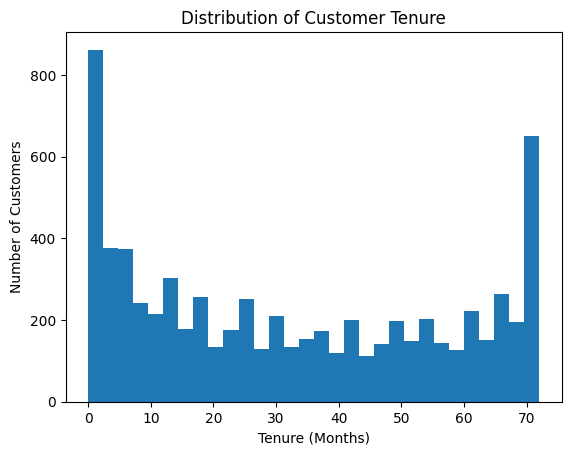

In [16]:
# Customer tenure ka distribution
plt.figure()
plt.hist(df["Tenure Months"], bins=30)
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.show()


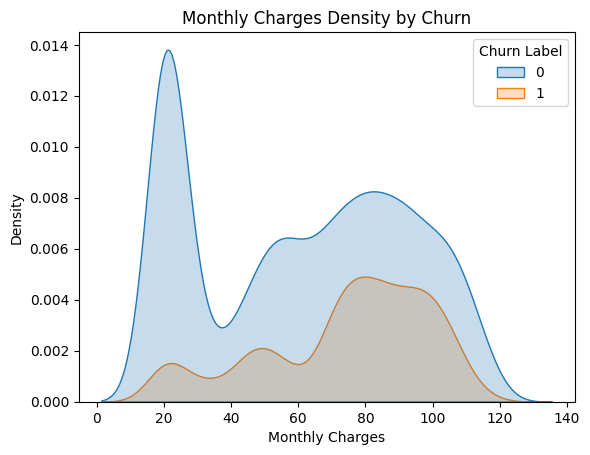

In [17]:
# Monthly charges ka density comparison
plt.figure()
sns.kdeplot(
    data=df,
    x="Monthly Charges",
    hue="Churn Label",
    fill=True
)
plt.title("Monthly Charges Density by Churn")
plt.xlabel("Monthly Charges")
plt.show()


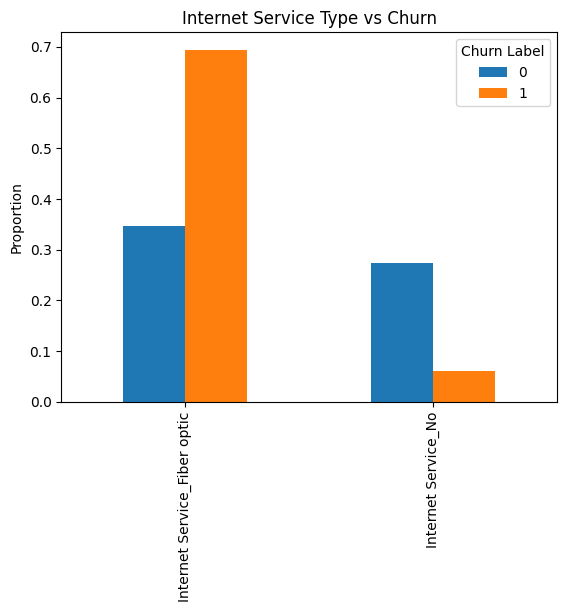

In [18]:
# Internet Service related dummy columns
internet_cols = [col for col in df.columns if "Internet Service_" in col]

internet_churn = df.groupby("Churn Label")[internet_cols].mean()

internet_churn.T.plot(kind="bar")
plt.title("Internet Service Type vs Churn")
plt.ylabel("Proportion")
plt.show()


In [19]:
# Figure 6
plt.figure()
plt.pie(churn_percent, labels=["No Churn", "Churn"], autopct="%1.1f%%")
plt.title("Customer Churn Percentage")
plt.savefig(os.path.join(report_path, "Fig6_Churn_Pie_Chart.png"))
plt.close()

# Figure 7
plt.figure()
plt.hist(df["Tenure Months"], bins=30)
plt.title("Tenure Distribution")
plt.savefig(os.path.join(report_path, "Fig7_Tenure_Distribution.png"))
plt.close()

# Figure 8
plt.figure()
sns.kdeplot(data=df, x="Monthly Charges", hue="Churn Label", fill=True)
plt.title("Monthly Charges Density by Churn")
plt.savefig(os.path.join(report_path, "Fig8_MonthlyCharges_Density.png"))
plt.close()

# Figure 9
internet_churn.T.plot(kind="bar")
plt.title("Internet Service vs Churn")
plt.savefig(os.path.join(report_path, "Fig9_InternetService_vs_Churn.png"))
plt.close()
